![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 12 - Non-parametric Regression </center>
### <center> Kernel Regression </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/12_NonparametricRegression/MainKernelRegression.ipynb)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

### Generate some data:
$$\mathcal{D}_{\text{train}}=\left\{ \left(x_{i},y_{i}\right)\right\} _{i=1}^{N}$$

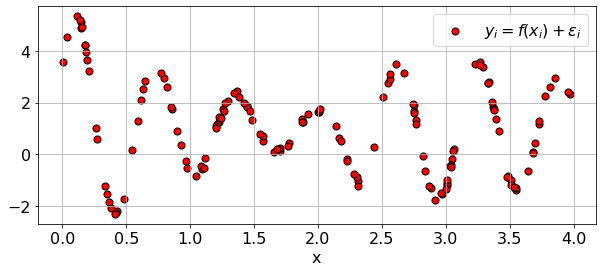

In [2]:
N   = 150
vX  = 4 * np.random.rand(N)
vY  = 5 * np.exp(-vX) * np.sin(10*vX + .5) * (1 + 10 * (vX > 2) * (vX - 2)) + 1
vY += np.random.randn(N) / 10

plt.figure(figsize=(10, 4))
plt.scatter(vX, vY, s=50, c='r', edgecolor='k', label='$y_i = f(x_i) + \epsilon_i$')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

### Define some kernels:
-- Uniform: $k\left(u\right)=\begin{cases}
1 & \left|u\right|\leq\frac{1}{2}\\
0 & \text{else}
\end{cases}$

-- Triangular: $k\left(u\right)=\begin{cases}
1-\left|u\right| & \left|u\right|\leq1\\
0 & \text{else}
\end{cases}$

-- Gaussian: $k\left(u\right)=e^{-\frac{1}{2}u^{2}}$

-- Cosine: $k\left(u\right)=\begin{cases}
1+\cos\left(\pi u\right) & \left|u\right|\leq1\\
0 & \text{else}
\end{cases}$

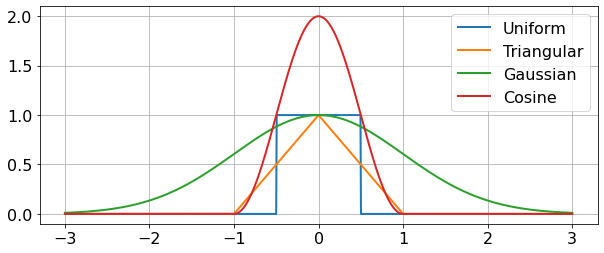

In [3]:
def Uniform(vU):
    return 1 * (np.abs(vU) < 1/2)

def Triangular(vU):
    return (np.abs(vU) < 1) * (1 - np.abs(vU))

def Gaussian(vU):
    return np.exp(-vU**2 / 2)

def Cosine(vU):
    return (np.abs(vU) < 1) * (1 + np.cos(np.pi * vU))

xx = np.linspace(-3, 3, 1000, endpoint=True)
plt.figure(figsize=(10, 4))
plt.plot(xx, Uniform(xx),    lw=2, label='Uniform')
plt.plot(xx, Triangular(xx), lw=2, label='Triangular')
plt.plot(xx, Gaussian(xx),   lw=2, label='Gaussian')
plt.plot(xx, Cosine(xx),     lw=2, label='Cosine')
plt.grid()
plt.legend()
plt.show()

### Plot kernel regression:
$$\boxed{\hat{f}\left(x\right)=\frac{\sum_{i=1}^{N}w_{x}\left(x_{i}\right)y_{i}}{\sum_{i=1}^{N}w_{x}\left(x_{i}\right)}}$$
where $$w_{x}\left(x_{i}\right)=k\left(\frac{x-x_{i}}{h}\right)$$

In [4]:
#-- Removing warning:
np.seterr(divide='ignore', invalid='ignore')

xx = np.linspace(-0.2, 4.5, 1000, endpoint=True)

def PlotKernelRegression(Kernel, h):
    mW    = Kernel((xx[:,None] - vX[None,:]) / h)
    vHatY = (mW @ vY) / np.sum(mW, 1)
    
    plt.figure(figsize=(14, 4))
    plt.plot(xx, vHatY, 'b', lw=2, label='$\hat{f}(x)$')
    plt.scatter(vX, vY, s=50, c='r', edgecolor='k', label='$y_i = f(x_i) + \epsilon_i$')
    plt.xlabel('x')
    plt.grid()
    plt.title(f'h = {h}')
    plt.legend(loc='lower right')

In [5]:
from ipywidgets import interact, FloatSlider, Layout, Dropdown

hSlider        = FloatSlider(min=0.005, max=.3, step=0.005, value=0.01, layout=Layout(width='80%'))
kernelDropdown = Dropdown(
    options=[('Uniform', Uniform), ('Triangular', Triangular), ('Gaussian', Gaussian), ('Cosine', Cosine)],
    value  = Gaussian,
    description='Kernel:',
)
interact(PlotKernelRegression, Kernel=kernelDropdown, h=hSlider)
plt.show()

interactive(children=(Dropdown(description='Kernel:', index=2, options=(('Uniform', <function Uniform at 0x000…

### Real data example:

In [6]:
import sklearn.datasets

dData = sklearn.datasets.load_boston()

In [7]:
mX = dData.data
vY = dData.target

mX -= mX.mean(0)
mX /= mX.std(0)

mX.shape, vY.shape

((506, 13), (506,))

In [8]:
from sklearn.metrics        import r2_score
from scipy.spatial.distance import cdist

N                     = len(vY)
h                     = .5
mD                    = cdist(mX, mX)    #-- pairwise distances
mW                    = Gaussian(mD / h) #-- Weights
mW[range(N),range(N)] = 0                #-- leave-one-out cross validation

vHatY = (mW @ vY) / np.sum(mW, 1)        #-- kernel regression
r2_score(vY, vHatY)

0.8220263327938513